In [46]:
import os
import cv2
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from keras.applications import vgg16

In [47]:
top_model = vgg16.VGG16(include_top = False,weights = 'imagenet',pooling = 'max')
for layer in top_model.layers[:-1]:
    layer.trainable = False

def load_images_from_folder(folder):
    images = []
    subfolders = [f.path for f in os.scandir(folder) if f.is_dir() ]
    for i in subfolders:
        print ("Reading", i)
        for filename in os.listdir(i):
            img = cv2.imread(os.path.join(i,filename))
            img = cv2.resize(img,(64,64))
            if img is not None:
                images.append(img)
    return images
Train=load_images_from_folder("AppData\Local\Programs\Python\Python35\dataset")
print(len(Train))

Reading AppData\Local\Programs\Python\Python35\dataset\34_sleeve
Reading AppData\Local\Programs\Python\Python35\dataset\angel_sleeve
Reading AppData\Local\Programs\Python\Python35\dataset\bell_sleeve
Reading AppData\Local\Programs\Python\Python35\dataset\bishop_sleeve
Reading AppData\Local\Programs\Python\Python35\dataset\butterfly_sleeve
Reading AppData\Local\Programs\Python\Python35\dataset\cape_sleeve
Reading AppData\Local\Programs\Python\Python35\dataset\cap_sleeve
Reading AppData\Local\Programs\Python\Python35\dataset\cold-shoulder
Reading AppData\Local\Programs\Python\Python35\dataset\kimono_sleeve
Reading AppData\Local\Programs\Python\Python35\dataset\long_sleeve
Reading AppData\Local\Programs\Python\Python35\dataset\puff_sleeve
Reading AppData\Local\Programs\Python\Python35\dataset\short_sleeve
Reading AppData\Local\Programs\Python\Python35\dataset\sleeveless
2007


In [48]:
import random
j=random.randrange(0, len(Train), 1)
print("Index Value:", j)
cv2.imshow('Image' ,Train[j])
cv2.waitKey(0)
cv2.destroyAllWindows()
print("Done Show")


Index Value: 1014
Done Show


In [49]:
X=[]
X=Train
subfolders = [f.path for f in os.scandir("AppData\Local\Programs\Python\Python35\dataset") if f.is_dir() ]
print(subfolders)
for i in subfolders:
    images=os.listdir(i)
    print(len(images))
Y = []
Y.extend(['1' for i in range(154)])
#Y[0:154]='1'
Y.extend(['2' for i in range(154, 308)])
#Y[154:308]='2'
Y.extend(['3' for i in range(308, 463)])
#Y[308:463]='3'
Y.extend(['4' for i in range(463, 618)])
#Y[463:618]='4'
Y.extend(['5' for i in range(618, 773)])
#Y[618:773]='5'
Y.extend(['6' for i in range(773, 928)])
#Y[773:928]='6'
Y.extend(['7' for i in range(928, 1083)])
#Y[928:1083]='7'
Y.extend(['8' for i in range(1083, 1238)])
#Y[1083:1238]='8'
Y.extend(['9' for i in range(1238, 1393)])
#Y[1238:1393]='9'
Y.extend(['10' for i in range(1393, 1548)])
#Y[1393:1548]='10'
Y.extend(['11' for i in range(1548, 1703)])
#Y[1548:1703]='11'
Y.extend(['12' for i in range(1703, 1858)])
#Y[1703:1858]='12'
Y.extend(['13' for i in range(1858, len(Train))])
#Y[1858:len(Train)]='13'
Y=pd.get_dummies(pd.DataFrame(Y))
Y = Y.values
print(Y)

['AppData\\Local\\Programs\\Python\\Python35\\dataset\\34_sleeve', 'AppData\\Local\\Programs\\Python\\Python35\\dataset\\angel_sleeve', 'AppData\\Local\\Programs\\Python\\Python35\\dataset\\bell_sleeve', 'AppData\\Local\\Programs\\Python\\Python35\\dataset\\bishop_sleeve', 'AppData\\Local\\Programs\\Python\\Python35\\dataset\\butterfly_sleeve', 'AppData\\Local\\Programs\\Python\\Python35\\dataset\\cape_sleeve', 'AppData\\Local\\Programs\\Python\\Python35\\dataset\\cap_sleeve', 'AppData\\Local\\Programs\\Python\\Python35\\dataset\\cold-shoulder', 'AppData\\Local\\Programs\\Python\\Python35\\dataset\\kimono_sleeve', 'AppData\\Local\\Programs\\Python\\Python35\\dataset\\long_sleeve', 'AppData\\Local\\Programs\\Python\\Python35\\dataset\\puff_sleeve', 'AppData\\Local\\Programs\\Python\\Python35\\dataset\\short_sleeve', 'AppData\\Local\\Programs\\Python\\Python35\\dataset\\sleeveless']
154
155
155
155
155
155
155
155
155
155
155
155
148
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 

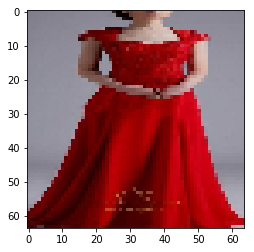

(2007, 64, 64, 3)
(2007, 13)
(1605, 64, 64, 3)
(1605, 13)


In [50]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(X[j], cv2.COLOR_BGR2RGB))
plt.show()

X = np.array(X,dtype = np.uint8)/255
X=X.reshape(2007,64,64,3)

print(X.shape)
print(Y.shape)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,  Y,test_size=0.2)
print(X_train.shape)
print(Y_train.shape)

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras_preprocessing.image import ImageDataGenerator

model = Sequential()
for l in top_model.layers : 
    model.add(l)

model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(13,activation = tf.nn.softmax))
model.compile(optimizer = 'adam',metrics = ["accuracy"],loss = "categorical_crossentropy")
model.fit(X_train, Y_train, epochs=10)
model.summary()
print("Model Evaluate")
print("Training set error",model.evaluate(X_train, Y_train))
print("Test set error",model.evaluate(X_test, Y_test))

Epoch 1/10
1605/1605 [==============================] - 60s 37ms/step - loss: 2.5999 - acc: 0.1009
Epoch 2/10
1605/1605 [==============================] - 57s 36ms/step - loss: 2.3952 - acc: 0.1682
Epoch 3/10
1605/1605 [==============================] - 55s 34ms/step - loss: 2.2533 - acc: 0.2498
Epoch 4/10
1605/1605 [==============================] - 54s 34ms/step - loss: 2.1004 - acc: 0.3065
Epoch 5/10
1605/1605 [==============================] - 53s 33ms/step - loss: 1.9806 - acc: 0.3483
Epoch 6/10
1605/1605 [==============================] - 58s 36ms/step - loss: 1.8303 - acc: 0.4093
Epoch 7/10
1605/1605 [==============================] - 53s 33ms/step - loss: 1.7161 - acc: 0.4274
Epoch 8/10
1605/1605 [==============================] - 56s 35ms/step - loss: 1.6001 - acc: 0.4810
Epoch 9/10
1605/1605 [==============================] - 57s 36ms/step - loss: 1.4592 - acc: 0.5277
Epoch 10/10
1605/1605 [==============================] - 58s 36ms/step - loss: 1.3388 - acc: 0.5626
_________